In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

Для простой квадратичной задачи - $diag(\mu, L)$. Пытаемся проверить Heavy-Ball со стандартными параметрами (из книжки Поляка).

In [4]:
def get_step(mu, L):
    return 4 / ((np.sqrt(mu) + np.sqrt(L)) ** 2)

def get_q(mu, L):
    return (np.sqrt(L) - np.sqrt(mu)) / (np.sqrt(L) + np.sqrt(mu))

def get_momentum(mu, L):
    return get_q(mu, L) ** 2


mu = 1
L = 100

h = get_step(mu, L)
beta = get_momentum(mu, L)
q = get_q(mu, L)

A = np.diag([mu, L])

x0 = np.array([100, 100])
y0 = np.hstack([x0, np.zeros(2)])

P = np.block([[-h * A + (1 + beta) * np.eye(2), -beta * np.eye(2)], [np.eye(2), np.zeros((2, 2))]])


print("Step   ", h)
print("Momentum  ", beta)


Step    0.03305785123966942
Momentum   0.6694214876033059


In [7]:
def gen_noise(dir, v, alpha, L, h):
    n = alpha * h * np.linalg.norm(A @ v[:2])
    dir[2] = 0
    dir[3] = 0
    u = dir / np.linalg.norm(dir) * n
    return u

def get_distances(iters, alpha):
    cur = y0
    ds = []
    for _ in range(iters):
        u = P @ cur
        noise = gen_noise(copy.deepcopy(u), cur, alpha, L, h)
        cur = u + noise
        ds.append(np.linalg.norm(cur))
    return ds

def plot_distances(iters, alpha):
    ds = get_distances(iters, alpha)
    with sns.plotting_context('notebook'), sns.axes_style('darkgrid'):
        plt.figure(figsize=(8, 5))
        plt.semilogy(np.arange(iters), ds)
        d = [np.linalg.norm(y0) * (q ** k) for k in range(1, iters + 1)]
        dd = [np.linalg.norm(y0) * ((1 - mu / L) ** k) for k in range(1, iters + 1)]
        plt.semilogy(np.arange(iters), d)
        plt.semilogy(np.arange(iters), dd)
        plt.title(f"Alpha - {alpha:.3f}")
        plt.show()


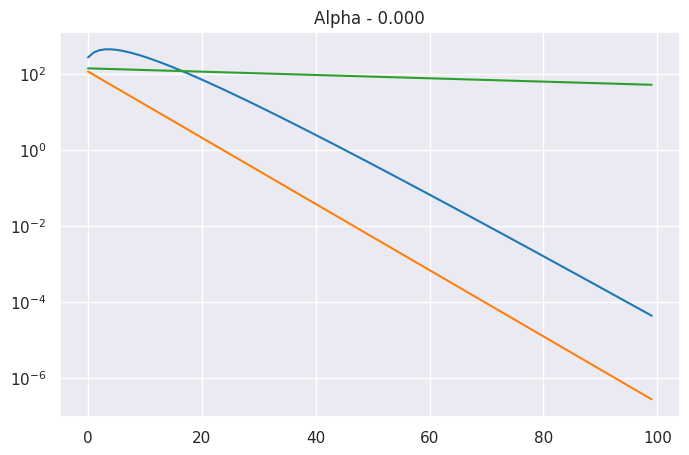

In [9]:
plot_distances(100, 0.)

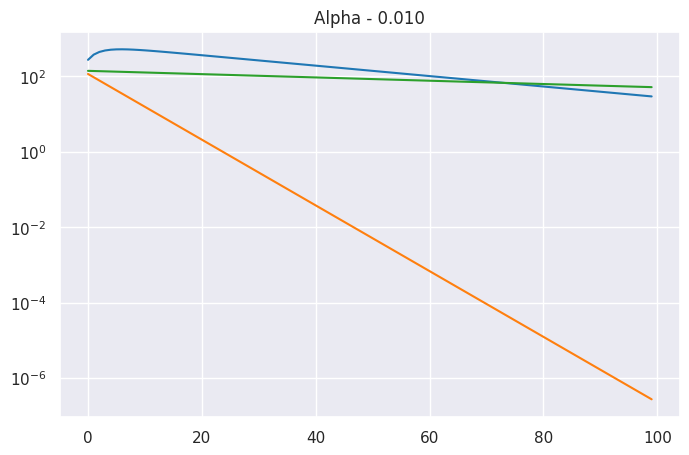

In [10]:
plot_distances(100, 0.01)

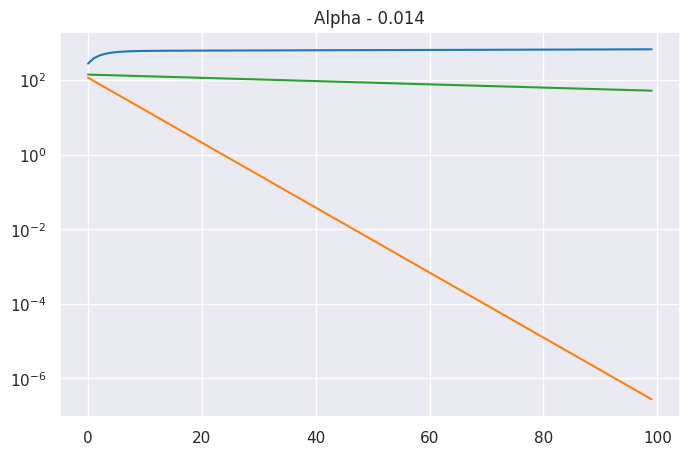

In [12]:
plot_distances(100, 1 / 70)

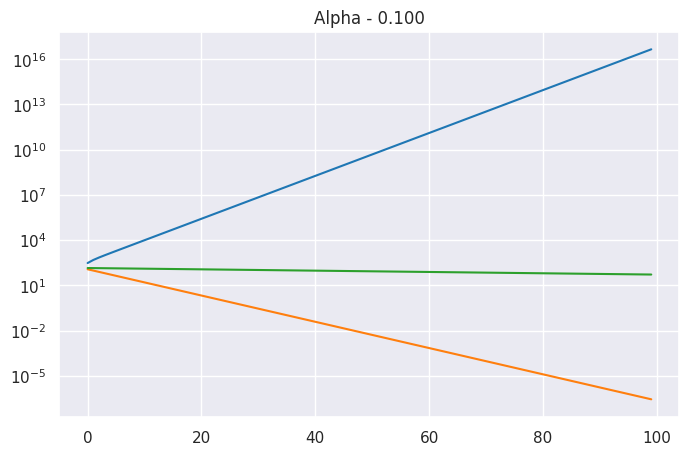

In [8]:
plot_distances(100, 0.1)